<a href="https://colab.research.google.com/github/jwkanggist/EverybodyTensorflow2.0/blob/master/lab12_cnn_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB12 Filtering over CNN
convolution 함수를 사용해서 필터링 해보자

In [0]:
# preprocessor parts

from __future__ import absolute_import, division, print_function, unicode_literals

# Install TensorFlow
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow.compat.v1 as tfv1
tfv1.disable_eager_execution()

from tensorflow.keras.callbacks import TensorBoard
from sklearn.datasets import load_sample_image

import numpy as np
import pandas as pd

from matplotlib import cm
from matplotlib import gridspec
import matplotlib.pyplot as plt

from datetime import datetime


In [0]:
# load images
china   = load_sample_image("china.jpg")
flower  = load_sample_image("flower.jpg")
dataset = np.array([china,flower],dtype=np.float32)

# load images data set size
batch_size,height, width, channels = dataset.shape

# create two 7 X 7 filters
filter_size = 7
num_of_filters = 2
filters = np.zeros(shape=(filter_size,filter_size,channels,num_of_filters),dtype=np.float32)

filters[:, 3, :, 0] = 1 # vertical line filters
filters[3, :, :, 1] = 1 # horizontal line filters

In [0]:
# Creat a graph with with input X plus a convolutional layer
# applying the 2 filter defined above
X = tfv1.placeholder(tfv1.float32, shape=[None, height, width, channels],name='input')

stride = 2
# prediction CNN with two filters and input X
# X is the input mini-batch
# 7 X 7 filters is the set of filters to apply
# padding = 'SAME', which means the conv layer use zero padding to keep the same feature map size
# padding = 'VALID', which mean the conv layer does not use zero padding
conv_output = tfv1.nn.conv2d(X,filters,strides=[1,stride,stride,1],padding='SAME')




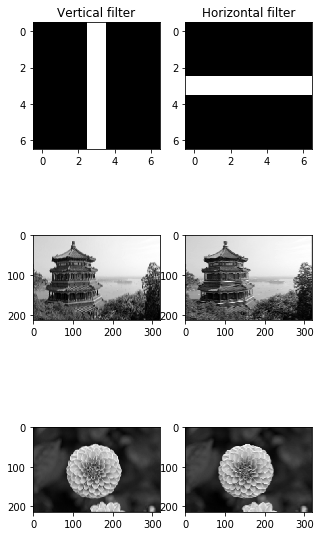

In [9]:

with tfv1.Session() as sess:
    output = sess.run(conv_output,feed_dict= {X:dataset})

hfig = plt.figure(1,figsize=(5,10))
plt.subplot(3,2,1)
plt.imshow(filters[:,:,:,0])
plt.title('Vertical filter')

plt.subplot(3,2,2)
plt.imshow(filters[:,:,:,1])
plt.title('Horizontal filter')

# plot 1st image's and feature map with vertical filter
plt.subplot(3,2,3)
plt.imshow(output[0,:,:,0], cmap='gray')

# plot 1st image's and feature map with horizontal filter
plt.subplot(3,2,4)
plt.imshow(output[0,:,:,1], cmap='gray')

# plot 2nd image's and feature map with vertical filter
plt.subplot(3,2,5)
plt.imshow(output[1,:,:,0], cmap='gray')

# plot 2nd image's and feature map with horizontal filter
plt.subplot(3,2,6)
plt.imshow(output[1,:,:,1], cmap='gray')

plt.show()